In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()

Section I. Prepare the Dataset for Building the Decision Tree

In [2]:
# Creating X_df
x_df=pd.DataFrame(iris.data, columns=iris.feature_names)
x_df.info()
x_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Creating y_df
y_df=pd.DataFrame(iris.target, columns=['class'])
y_df.info()
y_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


,class
0,0
1,0
2,0
3,0
4,0


In [4]:
# Single Data Frame with All Information
iris_df =x_df.append(y_df)
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    float64
dtypes: float64(5)
memory usage: 14.1 KB


/var/folders/yx/gpxzlp2s2q733wzcbjl6hv540000gn/T/ipykernel_22678/1882619979.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iris_df =x_df.append(y_df)


<AxesSubplot:>

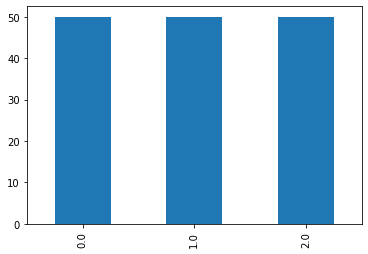

In [5]:
# Generating Bar Plot of Value Counts
iris_df['class'].value_counts().sort_index().plot.bar()

In [6]:
# Splitting the Dataset into Train and Test 
x_train_eval, x_test, y_train_eval, y_test = train_test_split(iris.data,
                                                    iris.target, 
                                                    test_size=0.10, 
                                                    random_state=1,
                                                    stratify=iris.target)

In [7]:
# Split Again to Train and Evaluation 
x_train, x_eval, y_train, y_eval = train_test_split(x_train_eval, y_train_eval, test_size=0.25, random_state=1, stratify= y_train_eval)

In [8]:
# Output Shape
x_train_eval.shape, x_test.shape, y_train_eval.shape, y_test.shape

((135, 4), (15, 4), (135,), (15,))

In [9]:
# Output Shape
x_train.shape, x_eval.shape, y_train.shape, y_eval.shape

((101, 4), (34, 4), (101,), (34,))

<AxesSubplot:>

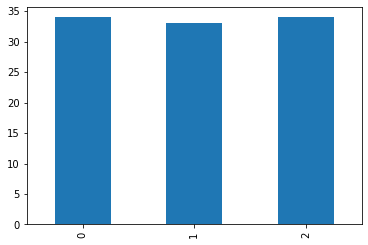

In [10]:
# Bar Plot for y_train_df
y_train_df = pd.DataFrame(y_train)
y_train_df[0].value_counts().sort_index().plot.bar()

Section II. Building the Decision Tree Classifiers

In [11]:
# Creating the First Model
tree_entropy = DecisionTreeClassifier(criterion='entropy')
tree_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [12]:
# Displaying the Tree in Text Format
from sklearn import tree
text_representation = tree.export_text(tree_entropy)
print(text_representation)

|--- feature_2 <= 2.60
|   |--- class: 0
|--- feature_2 >  2.60
|   |--- feature_2 <= 4.75
|   |   |--- class: 1
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  1.75
|   |   |   |--- class: 2



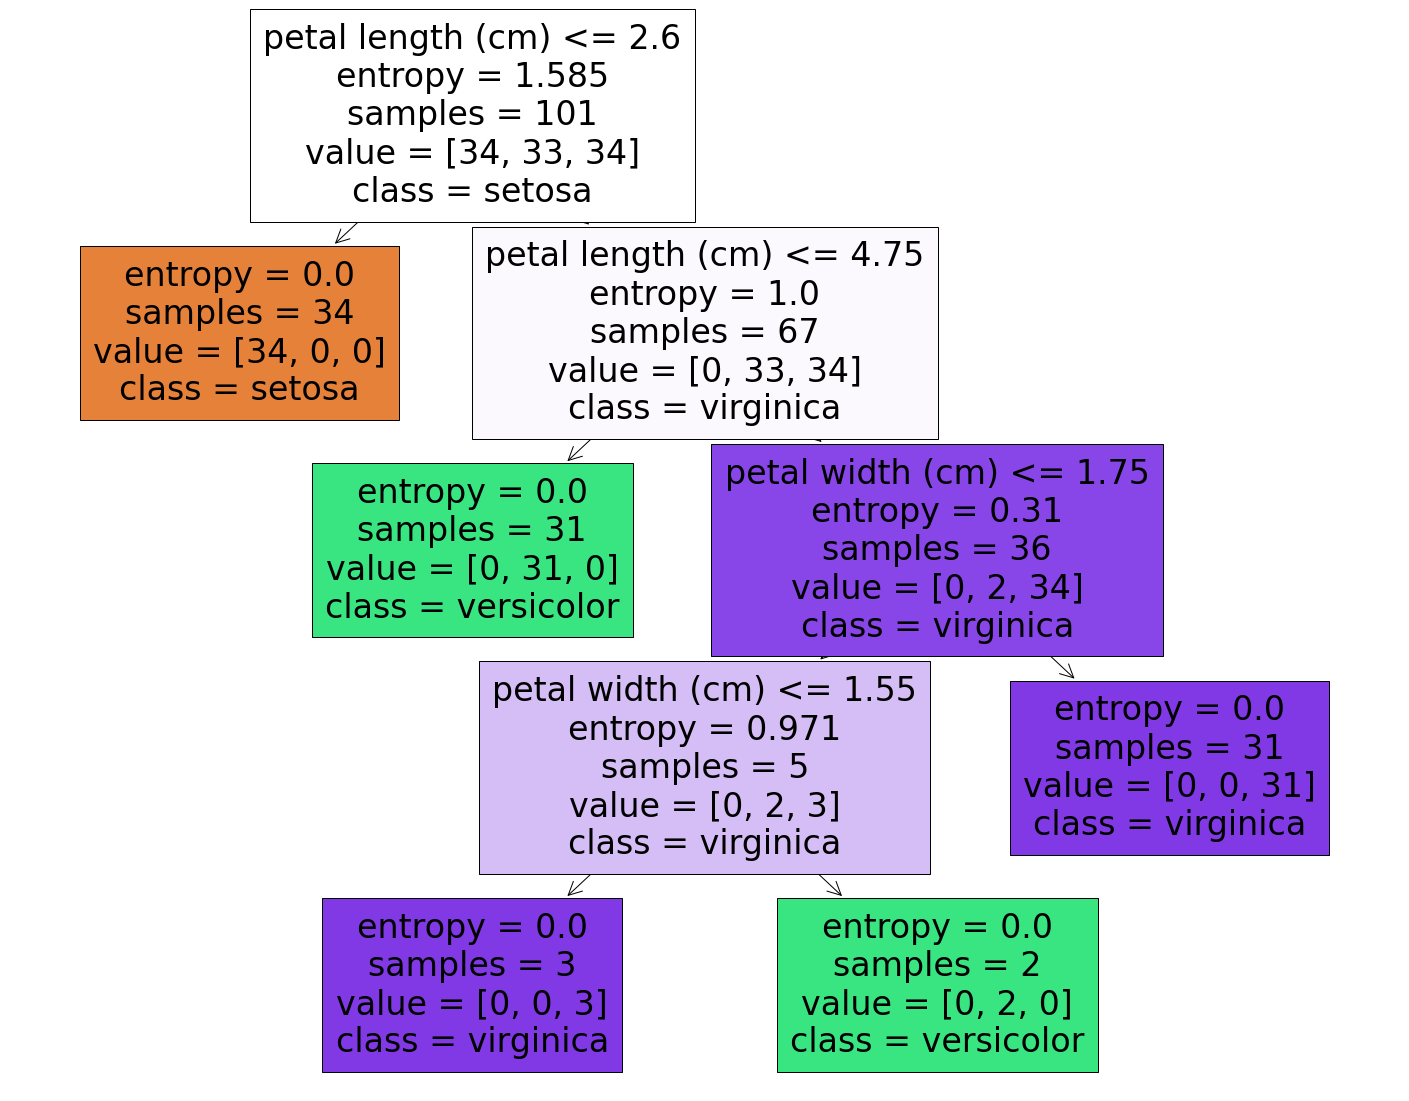

In [13]:
# Displaying the Tree as a Plot
fig=plt.figure(figsize=(25,20))
chart= tree.plot_tree(tree_entropy, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)

In [14]:
# Saving Figure to diagrams Folder
fig.savefig('./diagrams/DecisionTree1.png')

In [15]:
# Generating Plot Using Graphviz
import graphviz
dot_data= export_graphviz(tree_entropy, out_file=None, 
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True)


graph = graphviz.Source(dot_data, format="png")
graph

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
# Saving Output of diagrams Directory
graph=graphviz.Source(dot_data)
graph.render('./diagrams/Iris_entropy')

'diagrams/Iris_entropy.pdf'

In [ ]:
# Output the Important Features
tree_entropy.feature_importances_

array([0.       , 0.       , 0.3488896, 0.6511104])

In [ ]:
# Calculate Mean Accuracy
original_tree_score= tree_entropy
original_tree_score

DecisionTreeClassifier(criterion='entropy')

In [ ]:
# To Avoid Overfitting, Use max_depth=3, min_samples_leaf = 5 as an Initial Tree Depth
tree_entropy_3= DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
tree_entropy_3.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

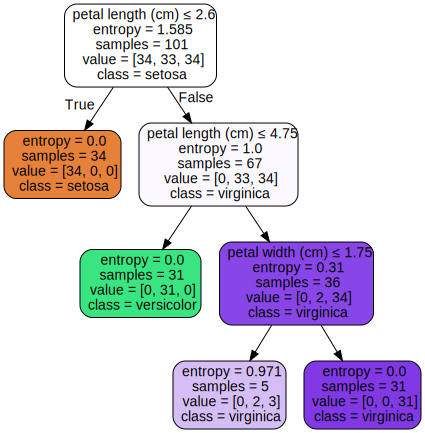

In [ ]:
# Generating Plot Using Graphviz
import graphviz
dot_data= export_graphviz(tree_entropy_3, out_file=None,
                        feature_names=iris.feature_names,
                        class_names=iris.target_names,
                        filled=True, rounded=True,
                        special_characters=True)

graph= graphviz.Source(dot_data, format="png")
graph

In [ ]:
# Saving Output of diagrams Directory
graph= graphviz.Source(dot_data)
graph.render('./diagrams/Iris_Entropy_3')

'diagrams/Iris_Entropy_3.pdf'

In [ ]:
# Calculate Mean Accuracy
depth3_tree_score= tree_entropy_3.score(x_eval, y_eval)
depth3_tree_score

0.8823529411764706

In [ ]:
# Create a Third Tree, Experimenting with max_depth and min_samples_leaf
tree_entropy_4= DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, criterion='entropy')
tree_entropy_4.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5)

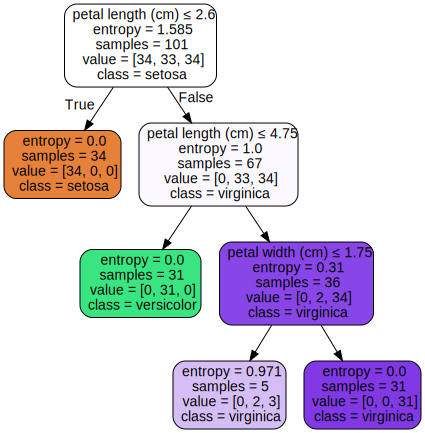

In [ ]:
# Generating Plot Using Graphviz
dot_data= export_graphviz (tree_entropy_4, out_file=None,
                        feature_names=iris.feature_names,
                        class_names=iris.target_names,
                        filled=True, rounded=True,
                        special_characters=True)

graph= graphviz.Source(dot_data, format="png")
graph

In [ ]:
# Saving Output of diagrams Directory
graph= graphviz.Source(dot_data)
graph.render('./diagrams/Iris_Entropy_4')

'diagrams/Iris_Entropy_4.pdf'

In [ ]:
# Calculate Mean Accuracy
depth4_tree_score= tree_entropy_4.score(x_eval, y_eval)
depth4_tree_score

0.8823529411764706

In [ ]:
# Output Mean Accruacy for All Three Decision Trees
print(f"original tree score= {original_tree_score} with depth as {tree_entropy.tree_.max_depth}\n\
    depth three tree score= {depth3_tree_score}\n\
    depth four tree score= {depth4_tree_score}")

original tree score= DecisionTreeClassifier(criterion='entropy') with depth as 4
    depth three tree score= 0.8823529411764706
    depth four tree score= 0.8823529411764706


Section III. Predicitons with the Decision Tree Classifier

In [ ]:
# Predict New Data's Class Label, Construct New DF p

# test_df['error']=np.where(test_df['class']!=test_df['pre'],1,0)
y_predict= tree_entropy_3.predict(x_test)
y_predict_p= tree_entropy_3.predict_proba(x_test)
test_df=pd.DataFrame(x_test, columns=iris.feature_names)
test_df['class']=y_test
test_df['pre']=y_predict
test_df['error']=np.where(test_df['class']!=test_df['pre'],1,0)
p=pd.DataFrame(y_predict_p, index= test_df.index,columns= tree_entropy_3.classes_ )

p.head()

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


In [ ]:
# Join test_df and p
test_df=test_df.join(p)
# Create a Column Showing the Proability Value of the Prediction
for i in test_df.index:
    c = test_df.loc[i, 'pre']
    test_df.loc[i,'p_score']=test_df.loc[i,c]
test_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,pre,error,0,1,2,p_score
0,4.9,2.5,4.5,1.7,2,1,1,0.0,1.0,0.0,1.0
1,5.1,2.5,3.0,1.1,1,1,0,0.0,1.0,0.0,1.0
2,5.7,2.5,5.0,2.0,2,2,0,0.0,0.0,1.0,1.0
3,4.9,3.6,1.4,0.1,0,0,0,1.0,0.0,0.0,1.0
4,5.5,2.3,4.0,1.3,1,1,0,0.0,1.0,0.0,1.0
5,4.4,2.9,1.4,0.2,0,0,0,1.0,0.0,0.0,1.0
6,5.0,3.5,1.6,0.6,0,0,0,1.0,0.0,0.0,1.0
7,7.1,3.0,5.9,2.1,2,2,0,0.0,0.0,1.0,1.0
8,6.3,3.3,4.7,1.6,1,1,0,0.0,1.0,0.0,1.0
9,6.2,3.4,5.4,2.3,2,2,0,0.0,0.0,1.0,1.0


Section IV. Model Evaluation

In [ ]:
# Generate the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[5, 0, 0],
       [0, 5, 0],
       [0, 1, 4]])

In [ ]:
# Output the Precision Scores for All Classes
from sklearn.metrics import precision_score, recall_score, accuracy_score
p0= precision_score(y_test, y_predict, labels=[0], average=None)
p1= precision_score(y_test, y_predict, labels=[1], average=None)
p2= precision_score(y_test, y_predict, labels=[2], average=None)

print(f"class 0 precision= {p0} \n\
class 1 precision= {p1}\n\
class 2precision= {p2}")

class 0 precision= [1.] 
class 1 precision= [0.83333333]
class 2precision= [1.]


In [ ]:
# Output the Overall Accuracy Score
a0=accuracy_score(y_test, y_predict, normalize=True)
print(f"overall accuracy= {a0}")

overall accuracy= 0.9333333333333333


In [ ]:
# Output the Recall Scores for All Classes
r0= recall_score(y_test, y_predict, labels=[0], average=None)
r1= recall_score(y_test, y_predict, labels=[1], average=None)
r2= recall_score(y_test, y_predict, labels=[2], average=None)

print(f"class 0 recall= {r0} \n\
class 1 recall = {r1}\n\
class 2 recall= {r2}")

class 0 recall= [1.] 
class 1 recall = [1.]
class 2 recall= [0.8]


In [ ]:
# Perform 10 Fold Cross Validation
tree_entropy_cross = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy')
scores= cross_val_score(tree_entropy_cross, iris.data, iris.target, cv=10, scoring='accuracy')
scores

array([1.        , 0.93333333, 1.        , 1.        , 0.93333333,
       0.86666667, 0.86666667, 1.        , 1.        , 1.        ])

In [ ]:
# Return Mean Accuracy & Confidence Interval
print("accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))


accuracy: 0.96 (+/- 0.11)


In [ ]:
# Fit treen_entropy_cross to the Entire Dataset
tree_entropy_cross.fit(iris.data, iris.target)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

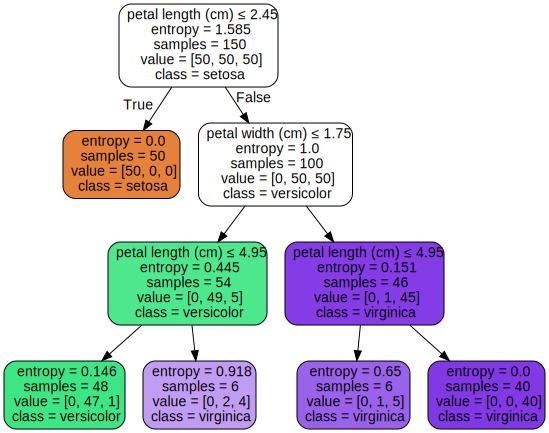

In [ ]:
# Gernerating Plot Using Graphviz
dot_data= export_graphviz(tree_entropy_cross, out_file=None, 
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)


graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
# Saving Output of diagrams Directory
graph= graphviz.Source(dot_data)
graph.render('./diagrams/Iris_Entropy_Cross')

'diagrams/Iris_Entropy_Cross.pdf'

In [ ]:
# Test Our Model on the Training Dataset
from sklearn.model_selection import cross_val_predict
y_train_pred= cross_val_predict(tree_entropy_cross, iris.data, iris.target, cv=10)
y_train_pred.shape

(150,)

In [ ]:
# Generate the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(iris.target,y_train_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  4, 46]])

In [ ]:
# Calculate the Precision Score of Each Class
p0= precision_score( iris.target, y_train_pred, labels=[0], average=None)
p1= precision_score( iris.target,y_train_pred, labels=[1], average=None)
p2= precision_score( iris.target,y_train_pred, labels=[2], average=None)

print(f"class 0 precision= {p0} \n\
class 1 precision= {p1}\n\
class 2precision= {p2}")

class 0 precision= [1.] 
class 1 precision= [0.92307692]
class 2precision= [0.95833333]


In [ ]:
# Calculate the Average Precision Score
precision_score(iris.target, y_train_pred, average='weighted')

0.9604700854700855

In [ ]:
# Calculate the Recall Score of Each Class
r0= recall_score(iris.target,y_train_pred, labels=[0], average=None)
r1= recall_score(iris.target,y_train_pred,labels=[1], average=None)
r2= recall_score(iris.target,y_train_pred, labels=[2], average=None)

print(f"class 0 recall= {r0} \n\
class 1 recall = {r1}\n\
class 2 recall= {r2}")

class 0 recall= [1.] 
class 1 recall = [0.96]
class 2 recall= [0.92]


In [ ]:
# Calculate the Average Recall Score
recall_score(iris.target, y_train_pred, average='weighted')

0.96

Section V. Saving the Model & Later Use

In [ ]:
# Save Your Model to the model Directory
import joblib
joblib.dump(tree_entropy_cross,'./model/iris_tree_entropy_cross.pkl' )

['./model/iris_tree_entropy_cross.pkl']

In [ ]:
# Use Your Model Later to Make Predictions!
my_model = joblib.load('./model/Iris_Tree_Entropy_Cross.pkl')